In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_csv('C:/Users/Shubh/Downloads/archive (3)/age_gender.csv')

In [3]:
# Convert pixel values from string to array
dataset['pixels'] = dataset['pixels'].apply(lambda x: np.array(x.split(), dtype='float32'))


In [4]:
# Reshape and scale the pixels
dataset['pixels'] = dataset['pixels'].apply(lambda x: x.reshape(48, 48, 1) / 255)

In [5]:
# Separate features and labels
x = np.array(dataset['pixels'].tolist())
age = np.array(dataset['age']).reshape(-1, 1)
gender = np.array(dataset['gender']).reshape(-1, 1)

In [6]:
# Split data into training and testing sets
x_train, x_test, age_y_train, age_y_test = train_test_split(x, age, test_size=0.2, random_state=42, shuffle=True)
_, _, gender_y_train, gender_y_test = train_test_split(x, gender, test_size=0.2, random_state=42, shuffle=True)


In [7]:
# Define and compile the age prediction model
age_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, activation='relu', kernel_size=3, input_shape=[48, 48, 1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'),
    tf.keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='linear')
])
age_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [16]:
# Train the age prediction model
age_model.fit(x_train, age_y_train, batch_size=32, epochs=20)


Epoch 1/20
593/593 [==============================] - 60s 100ms/step - loss: 75.6666 - mse: 75.6666
Epoch 2/20
593/593 [==============================] - 60s 101ms/step - loss: 69.6137 - mse: 69.6137
Epoch 3/20
593/593 [==============================] - 61s 102ms/step - loss: 67.9128 - mse: 67.9128
Epoch 4/20
593/593 [==============================] - 64s 107ms/step - loss: 62.0133 - mse: 62.0133
Epoch 5/20
593/593 [==============================] - 64s 107ms/step - loss: 58.6756 - mse: 58.6756
Epoch 6/20
593/593 [==============================] - 63s 106ms/step - loss: 57.1426 - mse: 57.1426
Epoch 7/20
593/593 [==============================] - 60s 102ms/step - loss: 55.7468 - mse: 55.7468
Epoch 8/20
593/593 [==============================] - 64s 108ms/step - loss: 52.7813 - mse: 52.7813
Epoch 9/20
593/593 [==============================] - 64s 108ms/step - loss: 49.5030 - mse: 49.5030
Epoch 10/20
593/593 [==============================] - 63s 107ms/step - loss: 47.5682 - mse: 47.5682

In [23]:
# Evaluate the age prediction model
age_loss, age_mse = age_model.evaluate(x_test, age_y_test)
print(f"Age Loss: {age_loss}, Age MSE: {age_mse}")

149/149 [==============================] - 2s 16ms/step - loss: 91.6725 - mse: 91.6725
Age Loss: 91.6725082397461, Age MSE: 91.6725082397461


In [21]:
# Predict age values
age_y_pred = age_model.predict(x_test)

149/149 [==============================] - 2s 16ms/step


Text(0.5, 1.0, 'Actual vs. Predicted Age')

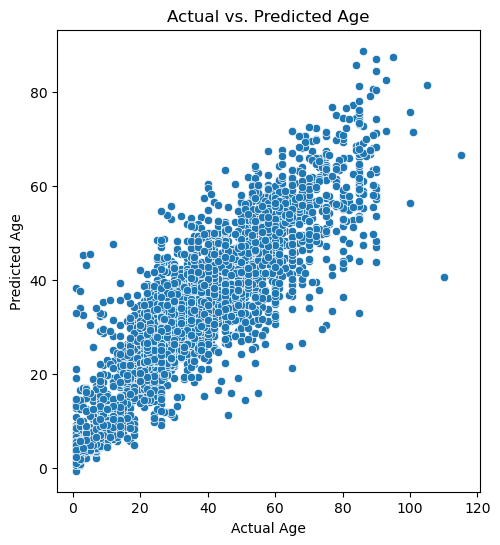

In [31]:
actual_color = 'blue'
predicted_color = 'red'

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=age_y_test.flatten(), y=age_y_pred.flatten())
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs. Predicted Age")

In [24]:
# Define and compile the gender prediction model
gender_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, activation='relu', kernel_size=3, input_shape=[48, 48, 1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'),
    tf.keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Train the gender prediction model
gender_model.fit(x_train, gender_y_train, batch_size=32, epochs=20)

Epoch 1/20
593/593 [==============================] - 62s 103ms/step - loss: 0.4011 - accuracy: 0.8100
Epoch 2/20
593/593 [==============================] - 61s 103ms/step - loss: 0.3043 - accuracy: 0.8624
Epoch 3/20
593/593 [==============================] - 62s 104ms/step - loss: 0.2730 - accuracy: 0.8797
Epoch 4/20
593/593 [==============================] - 64s 108ms/step - loss: 0.2510 - accuracy: 0.8932
Epoch 5/20
593/593 [==============================] - 63s 106ms/step - loss: 0.2306 - accuracy: 0.9015
Epoch 6/20
593/593 [==============================] - 63s 106ms/step - loss: 0.2078 - accuracy: 0.9120
Epoch 7/20
593/593 [==============================] - 63s 106ms/step - loss: 0.1912 - accuracy: 0.9205
Epoch 8/20
593/593 [==============================] - 63s 106ms/step - loss: 0.1655 - accuracy: 0.9317
Epoch 9/20
593/593 [==============================] - 63s 106ms/step - loss: 0.1521 - accuracy: 0.9398
Epoch 10/20
593/593 [==============================] - 63s 107ms/step - l

In [27]:
# Evaluate the gender prediction model
gender_loss, gender_accuracy = gender_model.evaluate(x_test, gender_y_test)
print(f"Gender Loss: {gender_loss}, Gender Accuracy: {gender_accuracy}")

149/149 [==============================] - 2s 16ms/step - loss: 0.3744 - accuracy: 0.8874
Gender Loss: 0.37436941266059875, Gender Accuracy: 0.8873655200004578


In [28]:
# Predict gender values
gender_y_pred = gender_model.predict(x_test)
gender_y_pred = (gender_y_pred > 0.5)

149/149 [==============================] - 2s 16ms/step


In [29]:
# Calculate and print gender confusion matrix and accuracy
gender_cm = confusion_matrix(gender_y_test, gender_y_pred)
gender_accuracy = accuracy_score(gender_y_test, gender_y_pred)
print("Gender Confusion Matrix:")
print(gender_cm)
print(f"Gender Accuracy: {gender_accuracy}")

Gender Confusion Matrix:
[[2211  257]
 [ 277 1996]]
Gender Accuracy: 0.8873655346973213


Text(0.5, 1.0, 'Actual vs. Predicted Age')

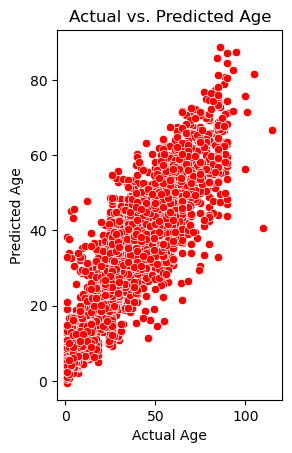

In [33]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=age_y_test.flatten(), y=age_y_pred.flatten(), color=predicted_color)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs. Predicted Age")